In [113]:
import numpy as np 
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split

**Importing csv files of 6 cities**



In [114]:
df_banglore = pd.read_csv('/content/Bangalore.csv')
df_chennai = pd.read_csv('/content/Chennai.csv')
df_delhi = pd.read_csv('/content/Delhi.csv')
df_hyderabad = pd.read_csv('/content/Hyderabad.csv')
df_kolkata = pd.read_csv('/content/Kolkata.csv')
df_mumbai = pd.read_csv('/content/Mumbai.csv')

**Append new column city**

In [115]:
df_banglore['city'] = 'Banglore'
df_chennai['city'] = 'Chennai'
df_delhi['city'] = 'Delhi'
df_hyderabad['city'] = 'Hyderabad'
df_kolkata['city'] = 'Kolkata'
df_mumbai['city'] = 'Mumbai'

In [116]:
df_banglore.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,city
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Banglore
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,Banglore
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Banglore
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Banglore
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Banglore


**Combining all 6 csv files data into one file.**

In [117]:
df_metrocities = pd.concat([df_banglore,df_chennai,df_delhi,df_hyderabad,df_kolkata,df_mumbai],axis=0)

In [118]:
df_metrocities.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,city
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Banglore
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,Banglore
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Banglore
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Banglore
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Banglore


**Exporting newly created CSV**

In [119]:
df_metrocities.to_csv('CombinedCities.csv',header=True)

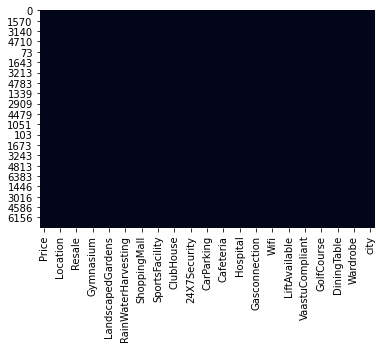

In [120]:
#visual method to see columns containing maximum null values
sn.heatmap(df_metrocities.isnull(),cbar=False)

**As per description 9 indicates not mentioned so we can consider it as NA**

In [121]:
df_metrocities.replace(9, np.nan, inplace=True)
df_metrocities.isnull().sum()

Price                      0
Area                       0
Location                   0
No. of Bedrooms            1
Resale                     0
MaintenanceStaff       22870
Gymnasium              22870
SwimmingPool           22870
LandscapedGardens      22870
JoggingTrack           22870
RainWaterHarvesting    22870
IndoorGames            22870
ShoppingMall           22870
Intercom               22870
SportsFacility         22870
ATM                    22870
ClubHouse              22870
School                 22870
24X7Security           22870
PowerBackup            22870
CarParking             22870
StaffQuarter           22870
Cafeteria              22870
MultipurposeRoom       22870
Hospital               22870
WashingMachine         22870
Gasconnection          22870
AC                     22870
Wifi                   22870
Children'splayarea     22870
LiftAvailable          22870
BED                    22870
VaastuCompliant        22870
Microwave              22870
GolfCourse    

In [122]:
df_metrocities.loc[df_metrocities['MaintenanceStaff'].isnull()]

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,city
1951,6884999,1215,Varthur,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Banglore
1952,7959999,1290,Electronic City Phase 2,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Banglore
1953,7975000,1505,Electronic City Phase 2,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Banglore
1954,7625000,1535,Electronic City Phase 2,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Banglore
1955,5760000,1465,Electronic City Phase 2,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Banglore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7714,14500000,1180,Mira Road East,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai
7715,14500000,530,Naigaon East,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai
7716,4100000,700,Shirgaon,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai
7717,2750000,995,Mira Road East,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai


**Remove Columns with threshold % missing values**

decide the threshold based on analysis of % of missing values in each column

threshold = 65%

In [123]:
df_metrocities.isnull().sum()/ df_metrocities.shape[0] * 100

Price                   0.000000
Area                    0.000000
Location                0.000000
No. of Bedrooms         0.003034
Resale                  0.000000
MaintenanceStaff       69.380821
Gymnasium              69.380821
SwimmingPool           69.380821
LandscapedGardens      69.380821
JoggingTrack           69.380821
RainWaterHarvesting    69.380821
IndoorGames            69.380821
ShoppingMall           69.380821
Intercom               69.380821
SportsFacility         69.380821
ATM                    69.380821
ClubHouse              69.380821
School                 69.380821
24X7Security           69.380821
PowerBackup            69.380821
CarParking             69.380821
StaffQuarter           69.380821
Cafeteria              69.380821
MultipurposeRoom       69.380821
Hospital               69.380821
WashingMachine         69.380821
Gasconnection          69.380821
AC                     69.380821
Wifi                   69.380821
Children'splayarea     69.380821
LiftAvaila

In [124]:
selected_col = df_metrocities.columns[df_metrocities.isnull().sum()/df_metrocities.shape[0] < 0.65]
df_metrocities = df_metrocities.loc[:,selected_col]
df_metrocities.shape

(32963, 6)

In [125]:
df_metrocities.head()

,Price,Area,Location,No. of Bedrooms,Resale,city
0,30000000,3340,JP Nagar Phase 1,4.0,0,Banglore
1,7888000,1045,Dasarahalli on Tumkur Road,2.0,0,Banglore
2,4866000,1179,Kannur on Thanisandra Main Road,2.0,0,Banglore
3,8358000,1675,Doddanekundi,3.0,0,Banglore
4,6845000,1670,Kengeri,3.0,0,Banglore


**Remove the rows with missing values greater than threshold %**

In [126]:
df_metrocities.dropna(axis=0, thresh=int(0.5*df_metrocities.shape[1]))
df_metrocities.shape

(32963, 6)

In [127]:
df_metrocities.head()

,Price,Area,Location,No. of Bedrooms,Resale,city
0,30000000,3340,JP Nagar Phase 1,4.0,0,Banglore
1,7888000,1045,Dasarahalli on Tumkur Road,2.0,0,Banglore
2,4866000,1179,Kannur on Thanisandra Main Road,2.0,0,Banglore
3,8358000,1675,Doddanekundi,3.0,0,Banglore
4,6845000,1670,Kengeri,3.0,0,Banglore


In [128]:
df_metrocities.isnull().sum()

Price              0
Area               0
Location           0
No. of Bedrooms    1
Resale             0
city               0
dtype: int64

In [129]:
df_metrocities.loc[df_metrocities['No. of Bedrooms'].isnull()] #area=4800, price=2400000
df_metrocities.loc[(df_metrocities['Area']>4000)&(df_metrocities['city']=='Kolkata')&(df_metrocities['Location']=='Lake Gardens')]

,Price,Area,Location,No. of Bedrooms,Resale,city
3746,2400000,4800,Lake Gardens,NaN,0,Kolkata


In [130]:
#Only one na value so after observing area and city we can  say that there can be 4 bedrrom
df_metrocities['No. of Bedrooms'].fillna(4,inplace=True)

In [131]:
df_metrocities.head()

,Price,Area,Location,No. of Bedrooms,Resale,city
0,30000000,3340,JP Nagar Phase 1,4.0,0,Banglore
1,7888000,1045,Dasarahalli on Tumkur Road,2.0,0,Banglore
2,4866000,1179,Kannur on Thanisandra Main Road,2.0,0,Banglore
3,8358000,1675,Doddanekundi,3.0,0,Banglore
4,6845000,1670,Kengeri,3.0,0,Banglore


In [132]:
df_metrocities.isnull().sum()

Price              0
Area               0
Location           0
No. of Bedrooms    0
Resale             0
city               0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


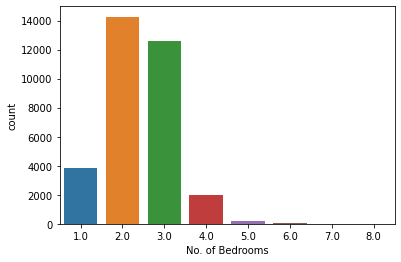

In [133]:
sn.countplot(df_metrocities['No. of Bedrooms'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


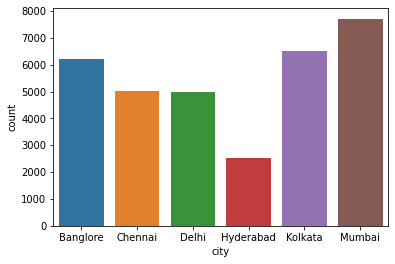

In [134]:
sn.countplot(df_metrocities['city'])

In [135]:
#pd.set_option()
df_metrocities.groupby('Location')['Location'].filter(lambda x: len(x) == 1)
df_metrocities.groupby('Location')['Location'].count()

Location
1 Lane Johri Farm         1
10 Sector Dwarka          2
15th Road                 1
200 Feet Radial Road      1
3 Dwarka Sector 9 Road    1
                         ..
vile parle west           8
vrindavan society         1
west venkatapuram         1
worli sea Fase            1
worli sea face            1
Name: Location, Length: 1776, dtype: int64

**Let's check unique values in few columns**

In [136]:
for col in df_metrocities:
    print(col,df_metrocities[col].nunique())

Price 4924
Area 2452
Location 1776
No. of Bedrooms 8
Resale 2
city 6


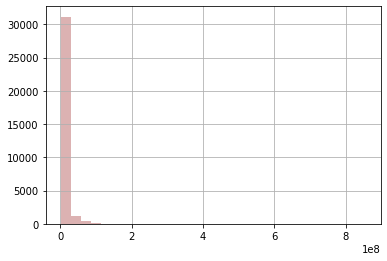

In [137]:
df_metrocities['Price'].hist(bins=30,color='darkred',alpha=0.3)

Coverting Price in thousand to lac

In [138]:
df_metrocities['Price']=df_metrocities['Price']/100000

In [139]:
df_metrocities.head()

,Price,Area,Location,No. of Bedrooms,Resale,city
0,300.00,3340,JP Nagar Phase 1,4.0,0,Banglore
1,78.88,1045,Dasarahalli on Tumkur Road,2.0,0,Banglore
2,48.66,1179,Kannur on Thanisandra Main Road,2.0,0,Banglore
3,83.58,1675,Doddanekundi,3.0,0,Banglore
4,68.45,1670,Kengeri,3.0,0,Banglore


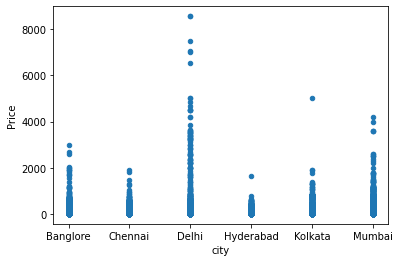

In [140]:
df_metrocities.plot(x='city', y= 'Price', kind='scatter')

In [141]:
df_metrocities.dtypes

Price              float64
Area                 int64
Location            object
No. of Bedrooms    float64
Resale               int64
city                object
dtype: object

In [142]:
df_metrocities.head()

,Price,Area,Location,No. of Bedrooms,Resale,city
0,300.00,3340,JP Nagar Phase 1,4.0,0,Banglore
1,78.88,1045,Dasarahalli on Tumkur Road,2.0,0,Banglore
2,48.66,1179,Kannur on Thanisandra Main Road,2.0,0,Banglore
3,83.58,1675,Doddanekundi,3.0,0,Banglore
4,68.45,1670,Kengeri,3.0,0,Banglore


In [143]:
dummy = pd.get_dummies(df_metrocities,columns=['Location','city'], drop_first = 'True')

In [144]:
dummy.head()

,Price,Area,No. of Bedrooms,Resale,Location_10 Sector Dwarka,Location_15th Road,Location_200 Feet Radial Road,Location_3 Dwarka Sector 9 Road,Location_4 Bunglows,Location_47 Sector 22 Road,Location_48 Sector 22 Road,Location_59 Sector 22 Road,Location_5th Phase,Location_5th Stage BEML Layout,Location_5th Stage Raja Rajeshwari Nagar,Location_6th phase jp nagar,Location_72 Sector 23 Road,Location_75 Noida Road,Location_75 Sector 22 Road,Location_77 Sector 6 Road,Location_78 Sector 6 Road,Location_79 Sector 23 Road,Location_7th Phase JP Nagar,Location_82 Sector 22 Road,Location_85 Sector 22 Road,Location_86 Sector 21 Road,Location_8th Phase JP Nagar,Location_92 Sector 22 Road,Location_AECS Layout A Block Singasandra,Location_AGS Layout Arehalli,Location_ALIND Employees Colony,Location_AS Rao Nagar,Location_Abbigere,Location_Abids,Location_Abiramapuram,Location_Abul Fazal Enclave Jamia Nagar,Location_Acharya Jagadish Chandra Bose Road,Location_Action Area I,Location_Action Area I Newtown,Location_Action Area II Newtown,...,Location_kolshet,Location_link road borivali west,Location_manneguda,Location_matunga east,Location_mayur vihar phase 1,Location_mumbai,Location_muthangi,Location_nawada,Location_new nallakunta,Location_nizampet road,Location_no 9,Location_param puri,Location_purbalok,Location_raghunathpur,Location_raheja vihar,Location_raidurgam,Location_roadpali navimumbai,Location_royal palms goregaon east,Location_salt lake sec iii,Location_sarjapura attibele road,Location_sec 50 new,Location_shalimar,Location_south dum dum,Location_taloja panchanand,Location_tambaram east,Location_tambaram west,Location_thakur village kandivali east,Location_ulhasnagar 4,Location_vasant vihar thane west,Location_vikaspuri,Location_vile parle west,Location_vrindavan society,Location_west venkatapuram,Location_worli sea Fase,Location_worli sea face,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai
0,300.00,3340,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,78.88,1045,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,48.66,1179,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,83.58,1675,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,68.45,1670,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [145]:
dummy.drop(['Price','Area','No. of Bedrooms','Resale'],axis=1,inplace=True)

In [146]:
dummy.head()

,Location_10 Sector Dwarka,Location_15th Road,Location_200 Feet Radial Road,Location_3 Dwarka Sector 9 Road,Location_4 Bunglows,Location_47 Sector 22 Road,Location_48 Sector 22 Road,Location_59 Sector 22 Road,Location_5th Phase,Location_5th Stage BEML Layout,Location_5th Stage Raja Rajeshwari Nagar,Location_6th phase jp nagar,Location_72 Sector 23 Road,Location_75 Noida Road,Location_75 Sector 22 Road,Location_77 Sector 6 Road,Location_78 Sector 6 Road,Location_79 Sector 23 Road,Location_7th Phase JP Nagar,Location_82 Sector 22 Road,Location_85 Sector 22 Road,Location_86 Sector 21 Road,Location_8th Phase JP Nagar,Location_92 Sector 22 Road,Location_AECS Layout A Block Singasandra,Location_AGS Layout Arehalli,Location_ALIND Employees Colony,Location_AS Rao Nagar,Location_Abbigere,Location_Abids,Location_Abiramapuram,Location_Abul Fazal Enclave Jamia Nagar,Location_Acharya Jagadish Chandra Bose Road,Location_Action Area I,Location_Action Area I Newtown,Location_Action Area II Newtown,Location_Action Area IIB Newtown,Location_Action Area III,Location_Adaigaon,Location_Adambakkam,...,Location_kolshet,Location_link road borivali west,Location_manneguda,Location_matunga east,Location_mayur vihar phase 1,Location_mumbai,Location_muthangi,Location_nawada,Location_new nallakunta,Location_nizampet road,Location_no 9,Location_param puri,Location_purbalok,Location_raghunathpur,Location_raheja vihar,Location_raidurgam,Location_roadpali navimumbai,Location_royal palms goregaon east,Location_salt lake sec iii,Location_sarjapura attibele road,Location_sec 50 new,Location_shalimar,Location_south dum dum,Location_taloja panchanand,Location_tambaram east,Location_tambaram west,Location_thakur village kandivali east,Location_ulhasnagar 4,Location_vasant vihar thane west,Location_vikaspuri,Location_vile parle west,Location_vrindavan society,Location_west venkatapuram,Location_worli sea Fase,Location_worli sea face,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
df_metrocities = df_metrocities.drop(['Location','city'],axis=1)

In [148]:
df_metrocities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32963 entries, 0 to 7718
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            32963 non-null  float64
 1   Area             32963 non-null  int64  
 2   No. of Bedrooms  32963 non-null  float64
 3   Resale           32963 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 2.5 MB


In [150]:
df_metrocities = pd.concat([df_metrocities,dummy],axis=1)

In [151]:
df_metrocities.head()

,Price,Area,No. of Bedrooms,Resale,Location_10 Sector Dwarka,Location_15th Road,Location_200 Feet Radial Road,Location_3 Dwarka Sector 9 Road,Location_4 Bunglows,Location_47 Sector 22 Road,Location_48 Sector 22 Road,Location_59 Sector 22 Road,Location_5th Phase,Location_5th Stage BEML Layout,Location_5th Stage Raja Rajeshwari Nagar,Location_6th phase jp nagar,Location_72 Sector 23 Road,Location_75 Noida Road,Location_75 Sector 22 Road,Location_77 Sector 6 Road,Location_78 Sector 6 Road,Location_79 Sector 23 Road,Location_7th Phase JP Nagar,Location_82 Sector 22 Road,Location_85 Sector 22 Road,Location_86 Sector 21 Road,Location_8th Phase JP Nagar,Location_92 Sector 22 Road,Location_AECS Layout A Block Singasandra,Location_AGS Layout Arehalli,Location_ALIND Employees Colony,Location_AS Rao Nagar,Location_Abbigere,Location_Abids,Location_Abiramapuram,Location_Abul Fazal Enclave Jamia Nagar,Location_Acharya Jagadish Chandra Bose Road,Location_Action Area I,Location_Action Area I Newtown,Location_Action Area II Newtown,...,Location_kolshet,Location_link road borivali west,Location_manneguda,Location_matunga east,Location_mayur vihar phase 1,Location_mumbai,Location_muthangi,Location_nawada,Location_new nallakunta,Location_nizampet road,Location_no 9,Location_param puri,Location_purbalok,Location_raghunathpur,Location_raheja vihar,Location_raidurgam,Location_roadpali navimumbai,Location_royal palms goregaon east,Location_salt lake sec iii,Location_sarjapura attibele road,Location_sec 50 new,Location_shalimar,Location_south dum dum,Location_taloja panchanand,Location_tambaram east,Location_tambaram west,Location_thakur village kandivali east,Location_ulhasnagar 4,Location_vasant vihar thane west,Location_vikaspuri,Location_vile parle west,Location_vrindavan society,Location_west venkatapuram,Location_worli sea Fase,Location_worli sea face,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai
0,300.00,3340,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,78.88,1045,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,48.66,1179,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,83.58,1675,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,68.45,1670,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **OUTLIER HANDLING**

In [152]:
#df_metrocities.select_dtypes(include='object')
#df_metrocities.head()
df_metrocities = df_metrocities.select_dtypes(exclude=['object'])

In [153]:
X = df_metrocities.drop('Price',axis=1)
Y = df_metrocities['Price']

Spliting train and test data

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25)

**Z-Scor for removing outlier**

In [155]:
df_metrocities.describe()

,Price,Area,No. of Bedrooms,Resale,Location_10 Sector Dwarka,Location_15th Road,Location_200 Feet Radial Road,Location_3 Dwarka Sector 9 Road,Location_4 Bunglows,Location_47 Sector 22 Road,Location_48 Sector 22 Road,Location_59 Sector 22 Road,Location_5th Phase,Location_5th Stage BEML Layout,Location_5th Stage Raja Rajeshwari Nagar,Location_6th phase jp nagar,Location_72 Sector 23 Road,Location_75 Noida Road,Location_75 Sector 22 Road,Location_77 Sector 6 Road,Location_78 Sector 6 Road,Location_79 Sector 23 Road,Location_7th Phase JP Nagar,Location_82 Sector 22 Road,Location_85 Sector 22 Road,Location_86 Sector 21 Road,Location_8th Phase JP Nagar,Location_92 Sector 22 Road,Location_AECS Layout A Block Singasandra,Location_AGS Layout Arehalli,Location_ALIND Employees Colony,Location_AS Rao Nagar,Location_Abbigere,Location_Abids,Location_Abiramapuram,Location_Abul Fazal Enclave Jamia Nagar,Location_Acharya Jagadish Chandra Bose Road,Location_Action Area I,Location_Action Area I Newtown,Location_Action Area II Newtown,...,Location_kolshet,Location_link road borivali west,Location_manneguda,Location_matunga east,Location_mayur vihar phase 1,Location_mumbai,Location_muthangi,Location_nawada,Location_new nallakunta,Location_nizampet road,Location_no 9,Location_param puri,Location_purbalok,Location_raghunathpur,Location_raheja vihar,Location_raidurgam,Location_roadpali navimumbai,Location_royal palms goregaon east,Location_salt lake sec iii,Location_sarjapura attibele road,Location_sec 50 new,Location_shalimar,Location_south dum dum,Location_taloja panchanand,Location_tambaram east,Location_tambaram west,Location_thakur village kandivali east,Location_ulhasnagar 4,Location_vasant vihar thane west,Location_vikaspuri,Location_vile parle west,Location_vrindavan society,Location_west venkatapuram,Location_worli sea Fase,Location_worli sea face,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai
count,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,...,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000
mean,116.867181,1293.362194,2.411613,0.381397,0.000061,0.000030,0.000030,0.000030,0.000091,0.000061,0.000030,0.000030,0.000334,0.000121,0.000152,0.000030,0.000030,0.000030,0.000030,0.000061,0.000061,0.000030,0.000030,0.000030,0.000030,0.000030,0.000243,0.000030,0.000091,0.000182,0.000030,0.000212,0.000607,0.000030,0.000030,0.000061,0.000030,0.000061,0.000243,0.000061,...,0.000182,0.000030,0.000030,0.000637,0.000273,0.000546,0.000061,0.000910,0.000091,0.000061,0.000030,0.000121,0.000061,0.000061,0.000061,0.000030,0.000091,0.000030,0.000091,0.002184,0.000030,0.000121,0.000425,0.000273,0.000030,0.001547,0.000091,0.000030,0.000121,0.000121,0.000243,0.000030,0.000030,0.000030,0.000030,0.152110,0.151625,0.076389,0.197403,0.234172
std,230.736815,763.703754,0.812036,0.485737,0.007789,0.005508,0.005508,0.005508,0.009540,0.007789,0.005508,0.005508,0.018265,0.011015,0.012315,0.005508,0.005508,0.005508,0.005508,0.007789,0.007789,0.005508,0.005508,0.005508,0.005508,0.005508,0.015577,0.005508,0.009540,0.013491,0.005508,

**Normalize Training and Test data**

In [87]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()

std_scaler.fit(X_train) # learn from Training data ONLY

x_std_train = std_scaler.transform(X_train.values)
X_train = pd.DataFrame(x_std_train,columns=X_train.columns)

x_std_test = std_scaler.transform(X_test.values)
X_test = pd.DataFrame(x_std_test,columns=X_test.columns)

In [156]:
def calc_limits_IQR(df, column):
    q1,q3 = df[column].quantile([0.25,0.75])
    print(column)
    iqr = q3 - q1
    min_val = q1 - (1.5 * iqr)
    max_val = q3 + (1.5 * iqr)
    return min_val, max_val

In [157]:
def impute_outliers_IQR(X,Y):
  # find only continuous columns / variables
  con_col = X.columns[X.nunique() > 10]

  for col in con_col:
    min_val, max_val = calc_limits_IQR(X, col)
    X.loc[X[col] < min_val,col] = min_val
    X.loc[X[col] > max_val,col] = max_val
  
  return X,Y

In [158]:
X_train_impute,Y_train_impute = impute_outliers_IQR(X_train.copy(),Y_train.copy())

Area


In [ ]:
X_train_impute.describe()

Applying Linear regression on non normalized data

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
lr_impute = LinearRegression().fit(X_train_impute,Y_train_impute)

In [162]:
Y_pred_impute = lr_impute.predict(X_test)

In [163]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred_impute)

58593.27758865612

In [164]:
rmse_impute = mean_squared_error(Y_test, Y_pred_impute) ** 0.5
rmse_impute

242.06048332732072

**Exporting model**

In [165]:
import pickle
with open('MetrocityLR-MODEL.pickle','wb') as f:
    pickle.dump(lr_impute,f)

**Exporting Columns of trained model**

In [166]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))